# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from datetime import date
%matplotlib inline

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_output_file = "output_data/cities.csv"
weather_output_file= "output_data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
print(*cities, sep=",")

kavieng,hofn,pevek,batsfjord,rikitea,saskylakh,bredasdorp,georgetown,rungata,hude,anito,campoverde,boueni,sitka,myitkyina,hualmay,taolanaro,cockburn town,sentyabrskiy,te anau,faanui,punta arenas,ingraj bazar,santa lucia,busselton,ushuaia,atuona,cap malheureux,ketchikan,hithadhoo,smirnykh,butaritari,hilo,belushya guba,aktash,hobart,ostrovnoy,nizhneyansk,cape town,chokurdakh,leningradskiy,castro,omboue,vao,saldanha,navirai,tibagi,dzhebariki-khaya,kentau,rovnoye,saint anthony,flinders,kapaa,provideniya,morondava,ponta do sol,albany,narsaq,maldonado,tiksi,thompson,cidreira,mar del plata,avarua,lebu,esperance,broome,hermanus,vannes,tasiilaq,vaini,los llanos de aridane,nauta,chumikan,mataura,yinchuan,ugoofaaru,cherskiy,ghanzi,khatanga,asau,barrow,upernavik,glendive,east london,sosnovo,dikson,mahajanga,ancud,chuy,mys shmidta,carnarvon,leh,zirl,katsuura,van wert,zhezkazgan,axim,saint-philippe,mahebourg,port alfred,bluff,kodiak,margate,mao,kavaratti,katangli,whyalla,kilindoni,iqaluit,meulaboh,c

In [4]:
#save cities list as csv
cities_df= pd.DataFrame({'City':cities}, index=None)
cities_df.to_csv(cities_output_file)


# Perform API Calls
    Perform a weather check on each city using a series of successive API calls.
    Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# build Url

base_url= 'https://api.openweathermap.org/data/2.5/weather?'

params={'appid':api_key,
       'unit':'metric',
       'q':cities[0]}


#get sample data for random city

response=requests.get(base_url, params=params).json()
response


{'coord': {'lon': 150.8, 'lat': -2.57},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'model',
 'main': {'temp': 302.11,
  'feels_like': 306,
  'temp_min': 302.11,
  'temp_max': 302.11,
  'pressure': 1008,
  'humidity': 70,
  'sea_level': 1008,
  'grnd_level': 1008},
 'wind': {'speed': 1.87, 'deg': 267},
 'rain': {'3h': 0.56},
 'clouds': {'all': 79},
 'dt': 1576372531,
 'sys': {'country': 'PG', 'sunrise': 1576352616, 'sunset': 1576396780},
 'timezone': 36000,
 'id': 2094342,
 'name': 'Kavieng',
 'cod': 200}

In [6]:
print(f"Processing record 1 of set 1 |{response['name']} ")

Processing record 1 of set 1 |Kavieng 


In [7]:
#setting up lists and other varibales
weather=[]
city_name=[]
cloudiness=[]
countries = []
date = []
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]


In [8]:
#get data for all the cities in the list
#############################################################################################
base_url= 'https://api.openweathermap.org/data/2.5/weather?'

params={'appid':api_key,
       'unit':'metric'}

print('Beginning Data Retrieval'+ '\n' + ('--')*25)

#set counters
count=1
counter=1

for city in cities:
    
    params['q'] = city
    
    try:
        
        city_weather= requests.get(base_url, params=params).json()
    
        print(f"Processing record {count} of set {counter} |{city_weather['name']} ")
        
        #Append the required lists
        city_name.append(city_weather['name'])
        weather.append(city_weather['weather'][0]['main'])
        cloudiness.append(city_weather['clouds']['all'])
        countries.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])   
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        
        count+=1
            
    except KeyError:
        print("City not found. Skipping...")
        
   

    if count==51:
        print("Count=50")
        time.sleep(3)
        counter+=1
        count=1
        
                
print(('--')*25+"\n" +"Data Retrieval Complete"+ "\n" +('--')*25)


Beginning Data Retrieval
--------------------------------------------------
Processing record 1 of set 1 |Kavieng 
Processing record 2 of set 1 |Hofn 
Processing record 3 of set 1 |Pevek 
Processing record 4 of set 1 |Batsfjord 
Processing record 5 of set 1 |Rikitea 
Processing record 6 of set 1 |Saskylakh 
Processing record 7 of set 1 |Bredasdorp 
Processing record 8 of set 1 |Georgetown 
City not found. Skipping...
Processing record 9 of set 1 |Hude 
Processing record 10 of set 1 |Anito 
Processing record 11 of set 1 |Campoverde 
Processing record 12 of set 1 |Boueni 
Processing record 13 of set 1 |Sitka 
Processing record 14 of set 1 |Myitkyina 
Processing record 15 of set 1 |Hualmay 
City not found. Skipping...
Processing record 16 of set 1 |Cockburn Town 
City not found. Skipping...
Processing record 17 of set 1 |Te Anau 
Processing record 18 of set 1 |Faanui 
Processing record 19 of set 1 |Punta Arenas 
Processing record 20 of set 1 |Ingraj Bazar 
Processing record 21 of set 1 |S

Processing record 36 of set 4 |Daru 
Processing record 37 of set 4 |Sao Joao del Rei 
Processing record 38 of set 4 |Vanavara 
Processing record 39 of set 4 |Silver City 
City not found. Skipping...
Processing record 40 of set 4 |Manta 
Processing record 41 of set 4 |Karwar 
Processing record 42 of set 4 |Storforshei 
Processing record 43 of set 4 |Nouadhibou 
Processing record 44 of set 4 |Khani 
Processing record 45 of set 4 |Jackville 
Processing record 46 of set 4 |Khovu-Aksy 
Processing record 47 of set 4 |Portland 
Processing record 48 of set 4 |Ilulissat 
Processing record 49 of set 4 |Arraial do Cabo 
Processing record 50 of set 4 |Kahului 
Count=50
Processing record 1 of set 5 |Chara 
Processing record 2 of set 5 |Alice Springs 
Processing record 3 of set 5 |Inhambane 
Processing record 4 of set 5 |Torbay 
Processing record 5 of set 5 |Aripuana 
Processing record 6 of set 5 |Constitucion 
Processing record 7 of set 5 |Pangkalanbuun 
City not found. Skipping...
Processing recor

Processing record 20 of set 8 |Allschwil 
Processing record 21 of set 8 |Watertown 
Processing record 22 of set 8 |Alyangula 
City not found. Skipping...
Processing record 23 of set 8 |Mnogovershinnyy 
Processing record 24 of set 8 |Colac 
Processing record 25 of set 8 |Kribi 
Processing record 26 of set 8 |Belle Fourche 
Processing record 27 of set 8 |Lubango 
Processing record 28 of set 8 |Barstow 
Processing record 29 of set 8 |Bowen 
Processing record 30 of set 8 |Oussouye 
Processing record 31 of set 8 |Opuwo 
Processing record 32 of set 8 |Shelburne 
City not found. Skipping...
Processing record 33 of set 8 |Awjilah 
Processing record 34 of set 8 |New Braunfels 
Processing record 35 of set 8 |Samarai 
Processing record 36 of set 8 |Fort Nelson 
Processing record 37 of set 8 |Caravelas 
Processing record 38 of set 8 |Yar-Sale 
Processing record 39 of set 8 |Taltal 
Processing record 40 of set 8 |Rome 
Processing record 41 of set 8 |Flin Flon 
Processing record 42 of set 8 |Cabra 


# Convert Raw Data to DataFrame

    Export the city data into a .csv.
    Display the DataFrame

In [9]:
city_weather_df=pd.DataFrame({"City":city_name ,
                              "Cloudiness":cloudiness,
                              "Country":countries,
                              "Date":date,
                              "Humidity":humidity,
                              "Latitude":lat,
                              "Longitude":lng,
                              "Max Temp":max_temp,
                              "Wind Speed":wind_speed
                             })
city_weather_df.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Latitude      543
Longitude     543
Max Temp      543
Wind Speed    543
dtype: int64

In [16]:
city_weather_df.to_csv(weather_output_file)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kavieng,79,PG,1576372531,70,-2.57,150.80,302.11,1.87
1,Hofn,0,IS,1576372565,62,64.25,-15.21,272.79,8.58
2,Pevek,100,RU,1576372565,94,69.70,170.27,254.50,3.87
3,Batsfjord,27,NO,1576372566,97,70.63,29.72,268.24,4.84
4,Rikitea,23,PF,1576372566,78,-23.12,-134.97,296.23,9.12


# Plotting the Data
    Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
    Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot


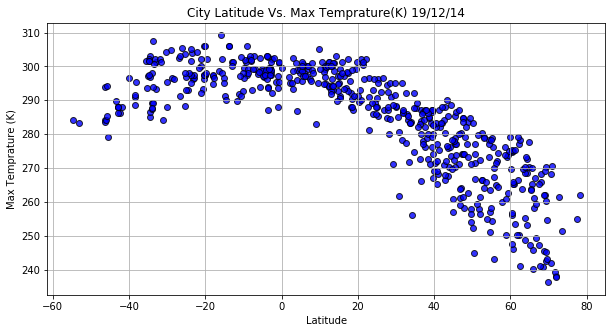

In [11]:
Date=time.strftime("%y/%m/%d")

plt.figure(figsize=(10,5))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Max Temp'],marker='o',
            facecolors ="blue", edgecolors='black',alpha = 0.8)

plt.title(f"City Latitude Vs. Max Temprature(K) {Date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (K)")
plt.grid(True)
plt.savefig("Images/Temparature.png")
plt.show()

#### Latitude vs. Humidity Plot

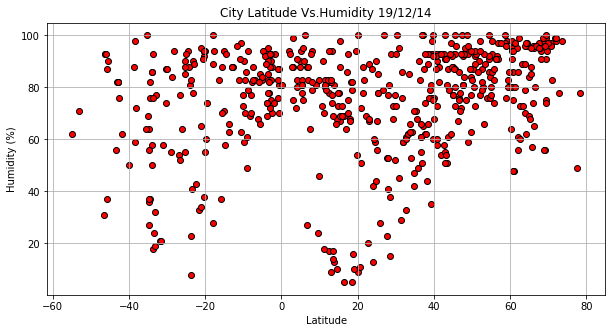

In [12]:
# Build the scatter plots 
Date=time.strftime("%y/%m/%d")

plt.figure(figsize=(10,5))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Humidity'],marker='o',
            facecolors ="red", edgecolors='black',alpha = 1 )

plt.title(f"City Latitude Vs.Humidity {Date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Images/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

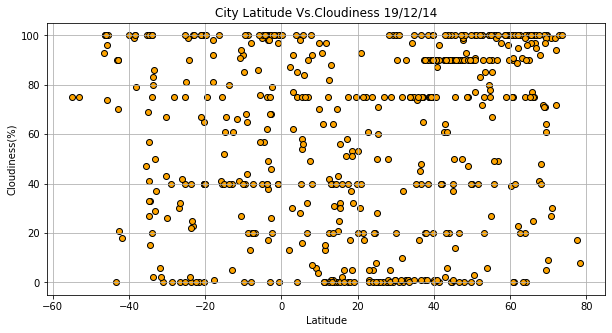

In [13]:
# Build the scatter plots 
Date=time.strftime("%y/%m/%d")

plt.figure(figsize=(10,5))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Cloudiness'],marker='o',
            facecolors ="orange", edgecolors='black',alpha = 1 )

plt.title(f"City Latitude Vs.Cloudiness {Date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("Images/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

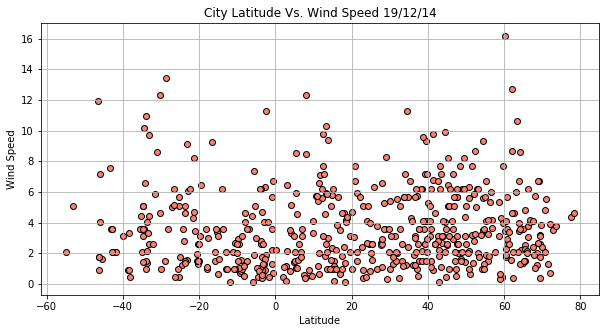

In [14]:
# Build the scatter plots 
Date=time.strftime("%y/%m/%d")

plt.figure(figsize=(10,5))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Wind Speed'],marker='o',
            facecolors ="salmon", edgecolors='black',alpha = 1 )

plt.title(f"City Latitude Vs. Wind Speed {Date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("Images/Wind Speed.png")
plt.show()